# Map Generator

On this notebook we present a implementation of a hybrid system comining ad-hoc techniques with L-System to create a procedural algorithm to create artificial cities that aim to be reliable cities to test our techniques.

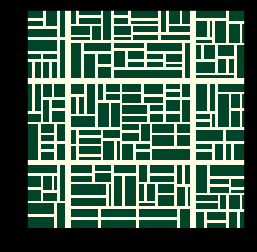

In [17]:
import random
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from tqdm import tqdm

In [25]:
def randomGauss(mean, stdev, max_t, min_t = 1):
    return max(min(int(random.gauss(mean, stdev)), max_t), 1)

In [26]:
# Constants
n_iter = 7
i_width = 20
i_height = 20

w_mean = i_width/2
h_mean = i_height/2

w_stdev = i_width/8
h_stdev = i_height/8

alpha = 0.8
ran_val = 4

In [27]:
# Variable 
# [width, height, x , y , h/v]

x1 = randomGauss(i_width/3, w_stdev, 2*int(i_width/3))
y1 = randomGauss(i_height/3, h_stdev, 2*int(i_height/3))
x2 = x1 + randomGauss( (i_width-x1-2-int(i_width/4))/2 , (i_width-x1-2)/6, i_width-x1-2) + int(i_width/4)
y2 = y1+max(min(int(random.gauss((i_height-y1-2-int(i_height/4))/2,(i_height-y1-2)/12)),(i_height-y1-2)),1)+int(i_height/4)

axiom = [ [x1,y1,0,0,0],[x2-x1-2,y1,x1+2,0,0],[i_width-x2-2,y1,x2+2,0,0]
         ,[x1,y2-y1-2,0,y1+2,0],[x2-x1-2,y2-y1-2,x1+2,y1+2,0], [i_width-x2-2,y2-y1-2,x2+2,y1+2,0]
         ,[x1,i_height-y2-2,0,y2+2,0], [x2-x1-2,i_height-y2-2,x1+2,y2+2,0], [i_width-x2-2,i_height-y2-2,x2+2,y2+2,0]]
for j in axiom:
    j[4] = 0 if j[0]>j[1] else 1

Definition of rules of the program

In [28]:
def apply_rules(a):
    if(a[0]<=4 or a[1]<=4):
        return [a]
    elif(random.uniform(0, 1) < alpha):
        grad = a[a[4]]
        n_var = randomGauss(grad/2, grad/6, grad-2, 2)
        
        cas1 = [n_var,a[(a[4]+1)%2],a[2+a[4]],a[2+(1+a[4])%2],1]
        cas2 = [a[a[4]]-n_var-1,a[(a[4]+1)%2],a[2+a[4]]+n_var+1,a[2+(1+a[4])%2],1]
        
        if(a[4]==1):
            cas1 = [cas1[1],cas1[0],cas1[3],cas1[2],0]
            cas2 = [cas2[1],cas2[0],cas2[3],cas2[2],0]
            
        return cas1,cas2
    else:
        return [a]

Main function of the L-System

In [29]:

cvar = axiom.copy()

for _ in tqdm(range(n_iter)):
    cvar2 = []
    for a in cvar:
        cvar2 += apply_rules(a)
    cvar = cvar2.copy()
    

mapa = [[0 for j in range(i_width)] for j in range(i_height)]
for j in cvar:
    for a1 in range(j[2],j[2]+j[0]):
        for a2 in range(j[3], j[3]+j[1]):
            mapa[a2][a1] = 1

100%|████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<?, ?it/s]


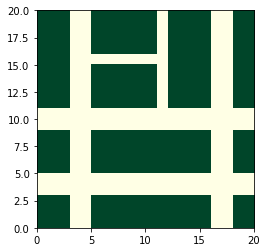

In [30]:
plt.imshow(mapa, interpolation='nearest', 
                 extent=[0, i_width, 0, i_height],
                 cmap='YlGn')

In [31]:
print(str(len(mapa)) + " " + str(len(mapa[0])))
print("\n".join([("".join([str(i) for i in a])) for a in mapa]))


20 20
11100111111011110011
11100111111011110011
11100111111011110011
11100111111011110011
11100000000011110011
11100111111011110011
11100111111011110011
11100111111011110011
11100111111011110011
00000000000000000000
00000000000000000000
11100111111111110011
11100111111111110011
11100111111111110011
11100111111111110011
00000000000000000000
00000000000000000000
11100111111111110011
11100111111111110011
11100111111111110011
